In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import asyncio
import time

from sklearn.cluster import KMeans
from sklearn.preprocessing import LabelEncoder
from sklearn.decomposition import PCA


In [3]:
df = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/Estadisitica/Proyecto_Final/brfss2013.csv", encoding='cp1252')

<ipython-input-3-a885941926b8>:1: DtypeWarning: Columns (11,14,50,53,102,103,104,105,108,111,112,113,118,119,120,121,122,123,125,126,127,130,132,134,139,140,141,142,143,144,145,146,147,148,149,150,151,152,153,154,155,156,157,158,159,160,161,162,163,164,165,166,167,168,169,170,171,172,173,174,175,177,178,179,180,181,182,183,184,185,186,187,188,190,191,192,193,194,195,197,199,200,201,202,203,204,205,206,207,208,209,210,211,212,216,226,227,228,229,230,312) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/Estadisitica/Proyecto_Final/brfss2013.csv", encoding='cp1252')


In [4]:
df.shape

(491775, 330)

In [22]:
df.head()

,X_state,fmonth,idate,imonth,iday,iyear,dispcode,seqno,X_psu,ctelenum,...,X_pastae1,X_lmtact1,X_lmtwrk1,X_lmtscl1,X_rfseat2,X_rfseat3,X_flshot6,X_pneumo2,X_aidtst3,X_age80
0,Alabama,January,1092013.0,January,9.0,2013.0,Completed interview,2.013001e+09,2.013001e+09,Yes,...,Did not meet both guidelines,Told have arthritis and have limited usual act...,Told have arthritis and have limited work,Told have arthritis and social activities limi...,Always or almost always wear seat belt,Always wear seat belt,NaN,NaN,No,60.0
1,Alabama,January,1192013.0,January,19.0,2013.0,Completed interview,2.013001e+09,2.013001e+09,Yes,...,Did not meet both guidelines,Not told they have arthritis,Not told they have arthritis,Not told they have arthritis,Always or almost always wear seat belt,Always wear seat belt,NaN,NaN,Yes,50.0
2,Alabama,January,1192013.0,January,19.0,2013.0,Completed interview,2.013001e+09,2.013001e+09,Yes,...,Did not meet both guidelines,Told have arthritis and have limited usual act...,Told have arthritis and have limited work,Told have arthritis and social activities limi...,Always or almost always wear seat belt,Always wear seat belt,NaN,NaN,Yes,55.0
3,Alabama,January,1112013.0,January,11.0,2013.0,Completed interview,2.013001e+09,2.013001e+09,Yes,...,Did not meet both guidelines,Not told they have arthritis,Not told they have arthritis,Not told they have arthritis,Always or almost always wear seat belt,Always wear seat belt,NaN,NaN,No,64.0
4,Alabama,February,2062013.0,February,6.0,2013.0,Completed interview,2.013001e+09,2.013001e+09,Yes,...,Did not meet both guidelines,Not told they have arthritis,Not told they have arthritis,Not told they have arthritis,Always or almost always wear seat belt,Always wear seat belt,No,No,No,66.0


In [23]:
df.describe()

,idate,iday,iyear,seqno,X_psu,numadult,nummen,numwomen,physhlth,menthlth,...,X_minac11,X_minac21,strfreq_,pamiss1_,pamin11_,pamin21_,pa1min_,pavig11_,pavig21_,X_age80
count,4.917730e+05,491772.000000,491770.000000,4.917720e+05,4.917730e+05,360124.000000,360125.000000,360125.000000,480818.000000,483148.000000,...,321736.000000,317119.000000,451951.000000,457743.000000,305512.000000,298023.000000,323814.000000,310354.000000,301810.000000,491764.000000
mean,6.672253e+06,13.749671,2013.011554,2.012998e+09,2.012994e+09,1.809529,0.813834,0.995599,4.352809,3.382734,...,227.785060,124.862805,1150.824820,0.128122,307.277213,163.206008,440.105045,79.485942,44.639170,54.773696
std,3.412168e+06,8.253897,0.106868,4.059552e+06,4.971904e+06,0.794296,0.620336,0.518258,8.854730,10.540449,...,383.047689,327.442243,2184.024274,8.721739,554.681322,448.991719,728.615228,246.043564,188.929618,17.031970
min,1.000000e+00,1.000000,2013.000000,1.000000e+00,1.000000e+00,1.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,4.022013e+06,7.000000,2013.000000,2.013002e+09,2.013002e+09,1.000000,0.000000,1.000000,0.000000,0.000000,...,70.000000,0.000000,0.000000,0.000000,84.000000,0.000000,109.000000,0.000000,0.000000,42.000000
50%,7.022013e+06,13.000000,2013.000000,2.013005e+09,2.013005e+09,2.000000,1.000000,1.000000,0.000000,0.000000,...,140.000000,30.000000,0.000000,0.000000,180.000000,30.000000,240.000000,0.000000,0.000000,57.000000
75%,1.001201e+07,20.000000,2013.000000,2.013008e+09,2.013008e+09,2.000000,1.000000,1.000000,3.000000,2.000000,...,245.000000,120.000000,2000.000000,0.000000,360.000000,175.000000,495.000000,70.000000,0.000000,68.000000
max,1.231201e+07,31.000000,2014.000000,2.013034e+09,2.013034e+09,45.000000,40.000000,16.000000,60.000000,5000.000000,...,44925.000000,40500.000000,99000.000000,5897.000000,81000.000000,81000.000000,81238.000000,40500.000000,40500.000000,80.000000


Weight is of type Object, and needs to be float, we convert to float to get rid of NAs and treat it as such throughout the study

In [12]:
df['weight2'].dtype

dtype('float64')

In [10]:
df = df[df['weight2'] != ".b"].copy() # Get rid of value that is not numeric
df['weight2'] = df['weight2'].astype(float).copy() # Transform to float

print("The type now is: ", df["weight2"].dtype)

The type now is:  float64


In [13]:
# Check for NAs
print("Total NAs before filling numerical NAs: ",df.isna().sum().sum())

# There are many NAs, I will fill the NAs of numerical columns with the average of the column
# Determine numerical columns
numerical_columns = df.select_dtypes(include=['number','float','int']).columns

# Fill NaNs with the mean of each numerical column
for column in numerical_columns:
    df[column].fillna(df[column].mean(), inplace=True)

# Check for NAs
print("Total NAs after filling numerical NAs: ",df.isna().sum().sum())



Total NAs before filling numerical NAs:  69865840
Total NAs after filling numerical NAs:  50842278


In [14]:
# Determine categorical columns
categorical_columns = df.select_dtypes(exclude=['number','float','int']).columns

# Fill NaNs with 'unknown' for each categorical column
for column in categorical_columns:
    df[column].fillna('unknown', inplace=True)

# Check for NAs
print("Total NAs after filling categorical NAs with unknown: ",df.isna().sum().sum())

Total NAs after filling categorical NAs with unknown:  0


In [15]:
# First, we want to get rid of all the people that did not complete their interview, as it is probably not good quality data, or important information may be missing.
# Remove rows where dispcode is "Partially completed interview"


print("Number of rows before getting rid of incompleted interviews: ", df.shape)
df = df[df['dispcode'] != "Partially completed interview"]
print("Number of rows after getting rid of incompleted interviews: ", df.shape)


Number of rows before getting rid of incompleted interviews:  (491774, 330)
Number of rows after getting rid of incompleted interviews:  (433226, 330)


We have filled in NAs as there were nearly 70 million values with NaNs out of 160 million values in total, rather than getting rid of those records which may have left us with not much data.

Now, we start exploring the data through initial EDA of categorical and numerical columns

In [16]:
async def eda_categorical(data, column_name):
    """
    Perform exploratory data analysis on a categorical column.

    Args:
    - data (DataFrame): The DataFrame containing the data.
    - column_name (str): The name of the categorical column to analyze.
    """
    async def check_execution_time():
        await asyncio.sleep(20)
        raise TimeoutError("Execution time exceeded 10 seconds.")

    async def explore_data():
        # Display value counts
        print("Value Counts:")
        print(data[column_name].value_counts())

        # Plot distribution of categories
        plt.figure(figsize=(10, 6))
        sns.countplot(data=data, x=column_name)
        plt.title(f"Distribution of {column_name}")
        plt.xticks(rotation=45)
        plt.show()

    try:
        # Execute explore_data asynchronously with a timeout
        await asyncio.wait_for(explore_data(), timeout=10)
    except asyncio.TimeoutError:
        raise TimeoutError("Execution time exceeded 10 seconds.")

async def eda_numerical(data, column_name):
    """
    Perform exploratory data analysis on a numerical column.

    Args:
    - data (DataFrame): The DataFrame containing the data.
    - column_name (str): The name of the numerical column to analyze.
    """
    async def check_execution_time():
        await asyncio.sleep(10)
        raise TimeoutError("Execution time exceeded 10 seconds.")

    async def explore_data():
        # Display summary statistics
        print("Summary Statistics:")
        print(data[column_name].describe())

        # Plot distribution of numerical values
        plt.figure(figsize=(10, 6))
        sns.histplot(data=data, x=column_name, kde=True)
        plt.title(f"Distribution of {column_name}")
        plt.xlabel(column_name)
        plt.show()

    try:
        # Execute explore_data asynchronously with a timeout
        await asyncio.wait_for(explore_data(), timeout=10)
    except asyncio.TimeoutError:
        raise TimeoutError("Execution time exceeded 10 seconds.")


In [17]:
# Define the columns to be used for stratified sampling
# This is based on importance of the columns in order to maintain a wide demographic across the sample
columns_of_interest = [
    'X_state', 'genhlth', 'physhlth', 'menthlth', 'hlthpln1', 'medcost', 'sleptim1',
    'bphigh4', 'bloodcho', 'cvdinfr4', 'asthma3', 'diabete3', 'veteran3', 'marital',
    'children', 'educa', 'employ1', 'income2', 'weight2', 'height3', 'sex',
    'pregnant', 'internet', 'blind', 'diffwalk', 'smoke100', 'drnkany5'
]


### Replace outliers with mean values, as there are inputs that do not make sense and are a result of bad inputs, such as 4000 hours of daily sleep.

In [18]:
# Getting rid of outliers in Numerical Columns and inserting the mean value
def replace_outliers_with_mean(df, column_name, z_threshold=3):
    """
    Replace outliers in a column of a DataFrame with the mean of the column.

    Args:
    - df (DataFrame): The DataFrame containing the data.
    - column_name (str): The name of the column to replace outliers in.
    - z_threshold (float): The Z-score threshold to identify outliers. Default is 3.

    Returns:
    - DataFrame: The DataFrame with outliers replaced with the mean of the column.
    """
    # Calculate Z-score for the column
    z_scores = np.abs((df[column_name] - df[column_name].mean()) / df[column_name].std())

    # Replace outliers with mean of the column
    df.loc[z_scores > z_threshold, column_name] = df[column_name].mean()

    return df

df_clean = df.copy()

for col in columns_of_interest:
    if col in numerical_columns:
      df_clean = replace_outliers_with_mean(df, col).copy()


Before replacing outliers, there are numerical values that are unreasonably large, probably from bad or wrong responses, such as 4000 hours of sleep daily.

### Run the EDA functions to gain an insight into each variable of importance

Value Counts:
X_state
Florida                 29143
Kansas                  21114
Nebraska                15809
Minnesota               12627
Massachusetts           12232
Maryland                11921
Colorado                11837
New Jersey              11776
Michigan                11707
Utah                    11156
Ohio                    10612
Washington              10104
Pennsylvania             9946
Kentucky                 9813
South Carolina           9652
Indiana                  9011
Montana                  8978
Texas                    8917
California               8657
New Mexico               8135
North Carolina           7789
Maine                    7695
Oklahoma                 7499
New York                 7334
Virginia                 7294
Georgia                  7287
Iowa                     7259
North Dakota             7143
Hawaii                   7041
Mississippi              6770
Connecticut              6726
Missouri                 6394
South Dakota      

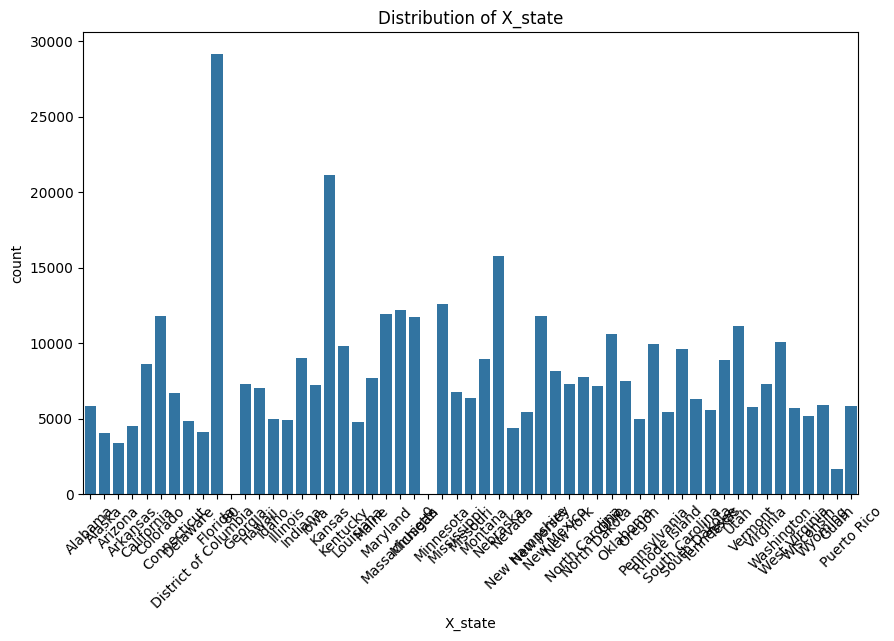

Value Counts:
genhlth
Very good    141481
Good         132370
Excellent     74154
Fair          58942
Poor          24574
unknown        1705
Name: count, dtype: int64


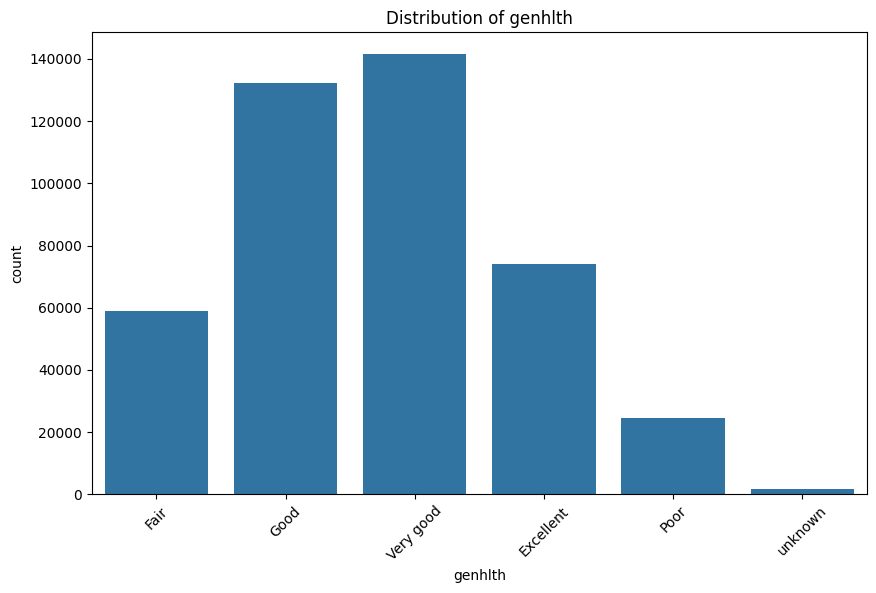

Summary Statistics:
count    433226.000000
mean          4.380727
std           8.783008
min           0.000000
25%           0.000000
50%           0.000000
75%           4.000000
max          30.000000
Name: physhlth, dtype: float64


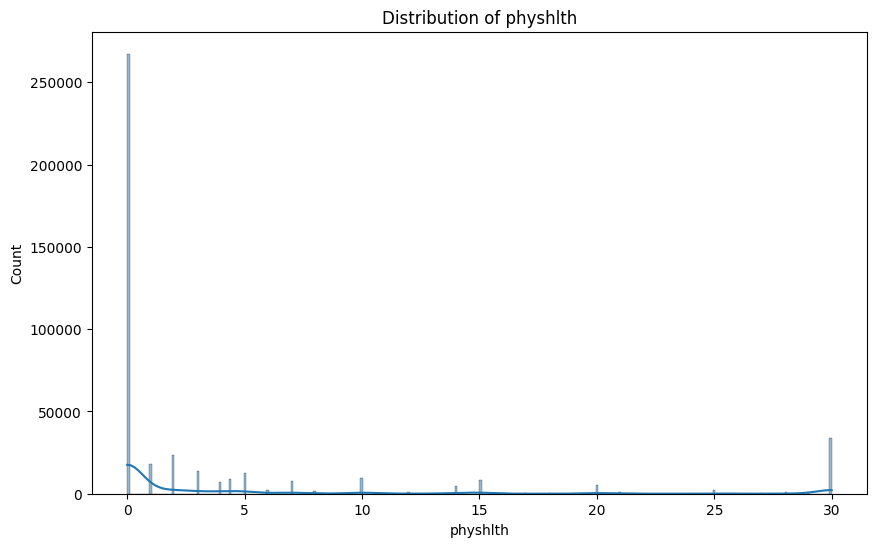

Summary Statistics:
count    433226.000000
mean          3.351605
std           7.608299
min           0.000000
25%           0.000000
50%           0.000000
75%           2.000000
max          30.000000
Name: menthlth, dtype: float64


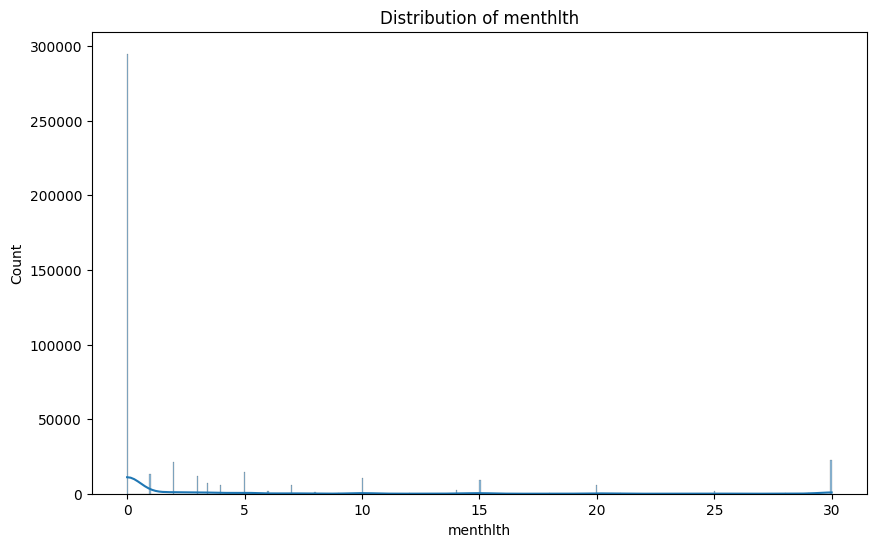

Value Counts:
hlthpln1
Yes        385291
No          46429
unknown      1506
Name: count, dtype: int64


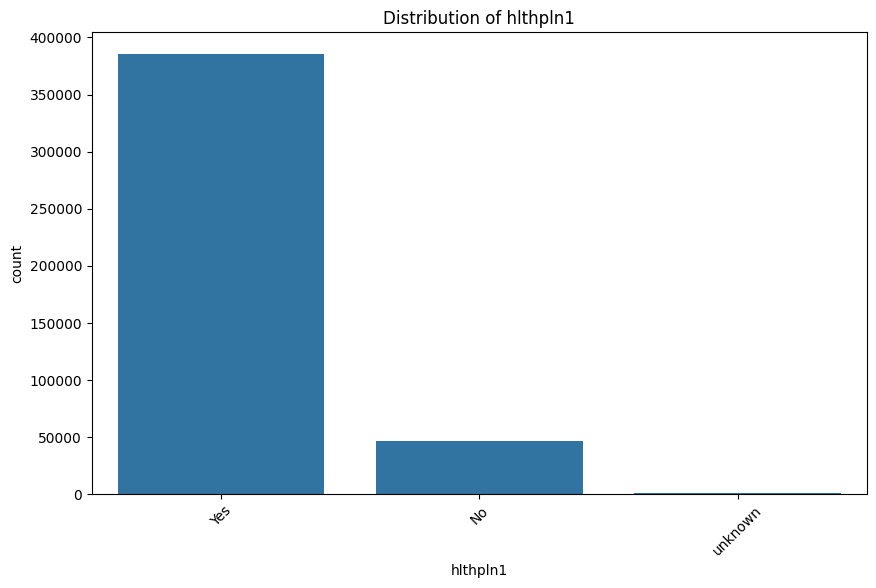

Value Counts:
medcost
No         380753
Yes         51452
unknown      1021
Name: count, dtype: int64


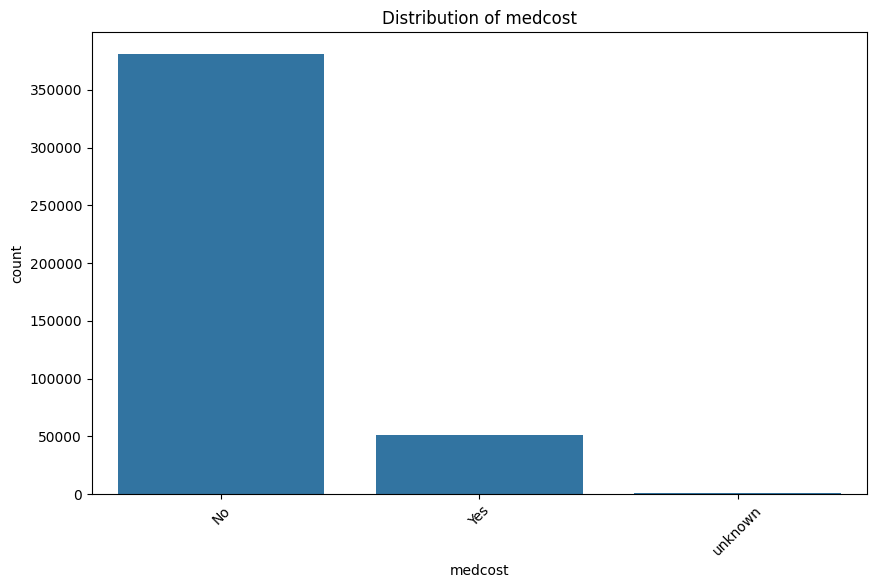

Summary Statistics:
count    433226.000000
mean          7.001949
std           1.258378
min           3.000000
25%           6.000000
50%           7.000000
75%           8.000000
max          11.000000
Name: sleptim1, dtype: float64


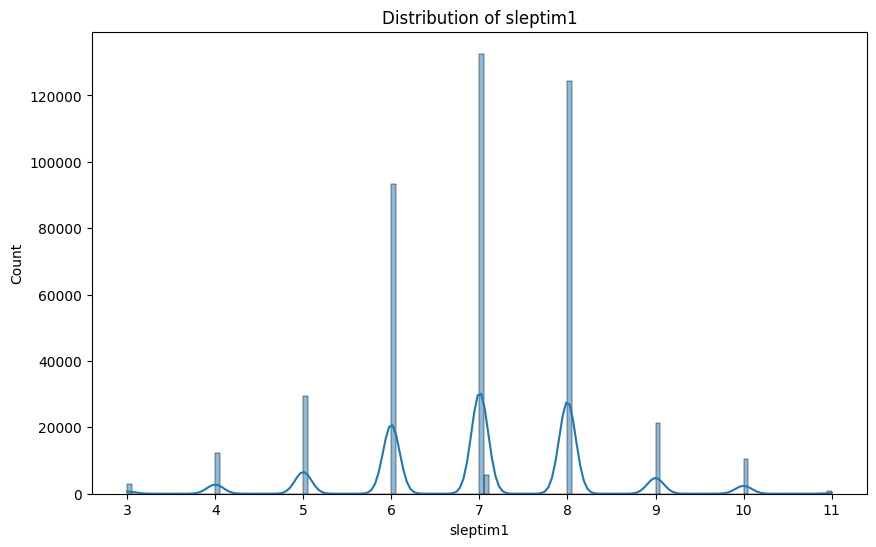

Value Counts:
bphigh4
No                                            245312
Yes                                           178839
Told borderline or pre-hypertensive             4657
Yes, but female told only during pregnancy      3255
unknown                                         1163
Name: count, dtype: int64


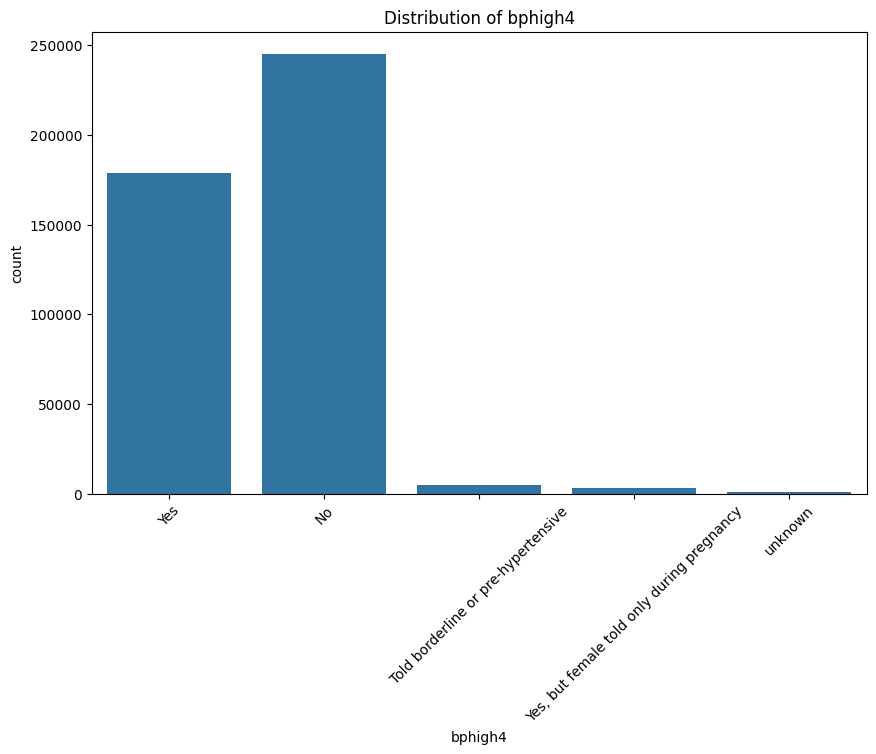

Value Counts:
bloodcho
Yes        377206
No          48452
unknown      7568
Name: count, dtype: int64


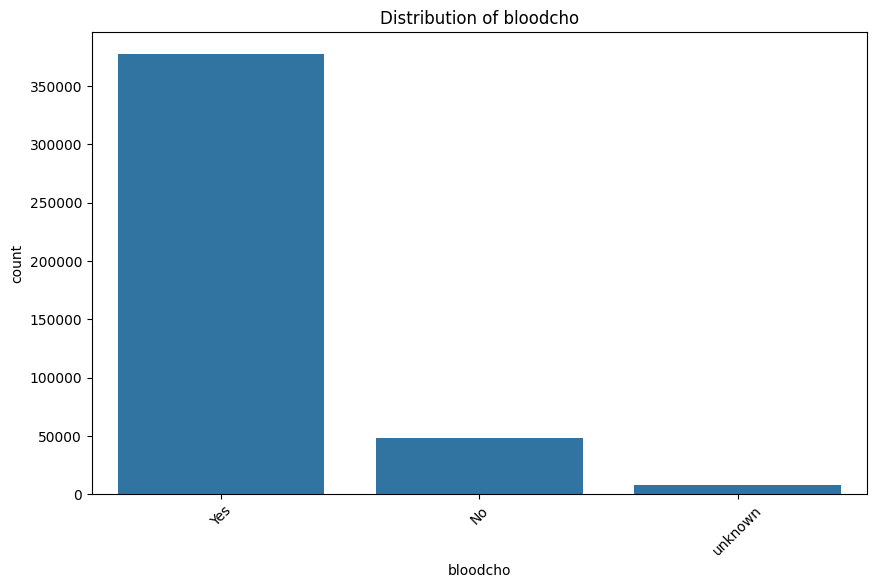

Value Counts:
cvdinfr4
No         404779
Yes         26288
unknown      2159
Name: count, dtype: int64


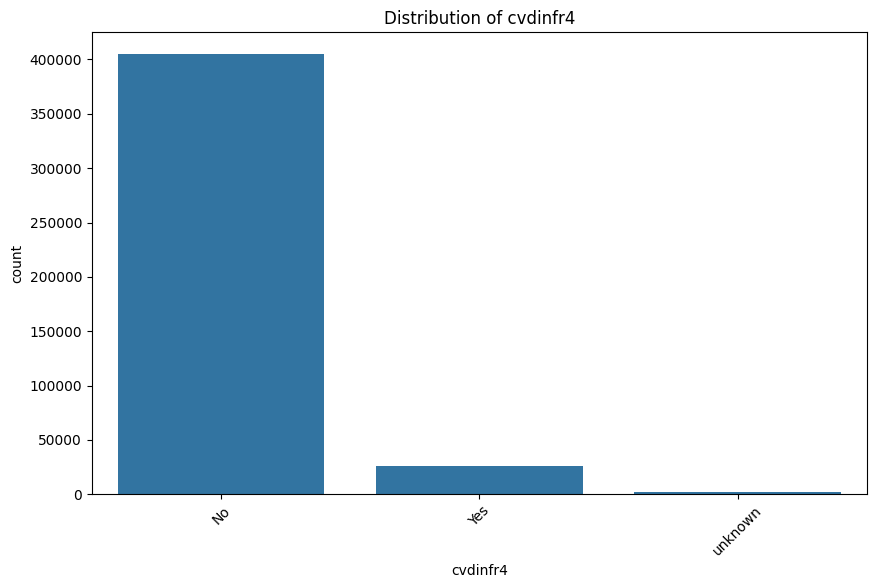

Value Counts:
asthma3
No         372434
Yes         59442
unknown      1350
Name: count, dtype: int64


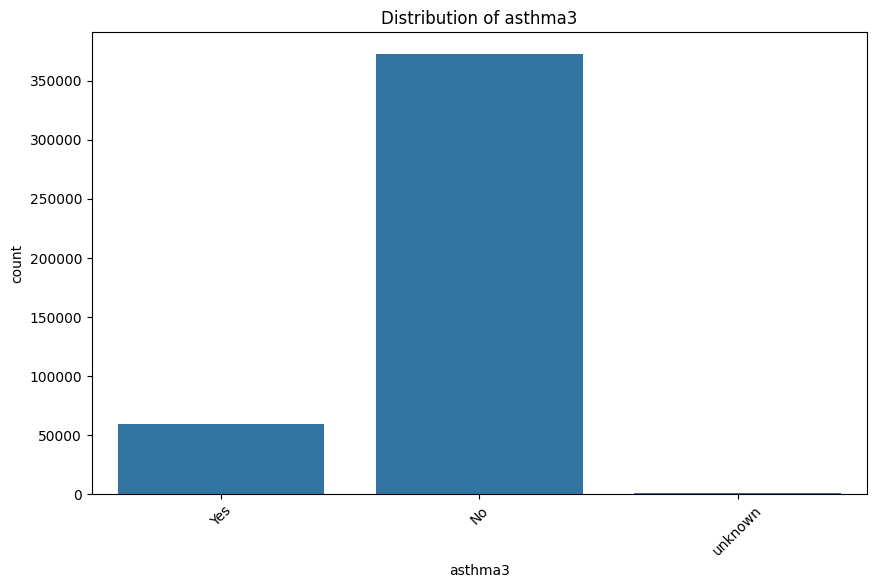

Value Counts:
diabete3
No                                            364507
Yes                                            56143
No, pre-diabetes or borderline diabetes         7821
Yes, but female told only during pregnancy      4077
unknown                                          678
Name: count, dtype: int64


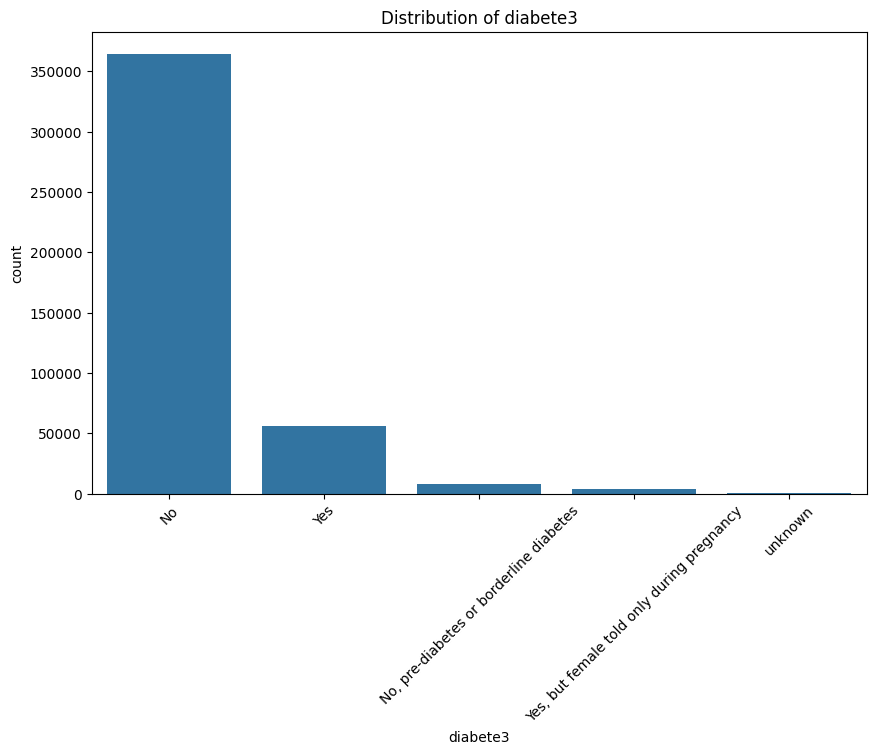

Value Counts:
veteran3
No         378360
Yes         54494
unknown       372
Name: count, dtype: int64


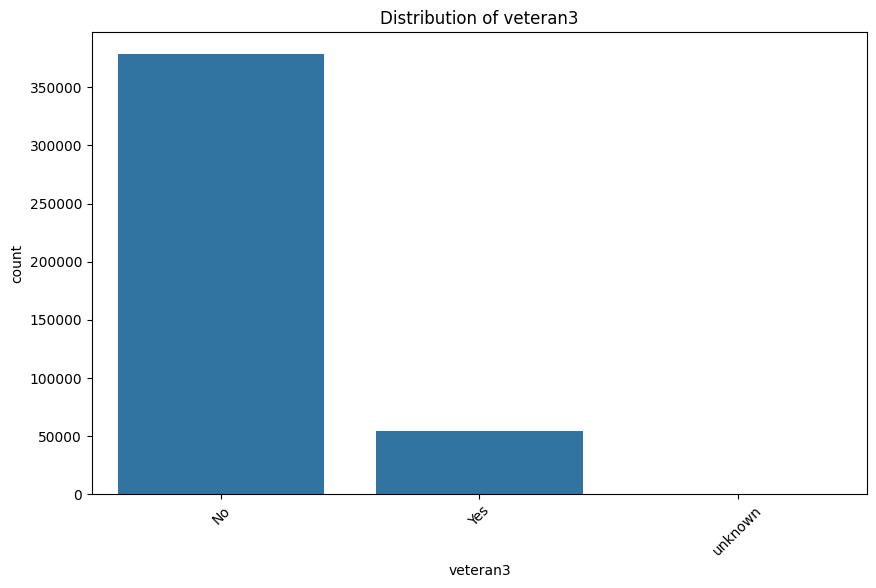

Value Counts:
marital
Married                            225651
Divorced                            62781
Never married                       62701
Widowed                             59513
A member of an unmarried couple     11204
Separated                            9156
unknown                              2220
Name: count, dtype: int64


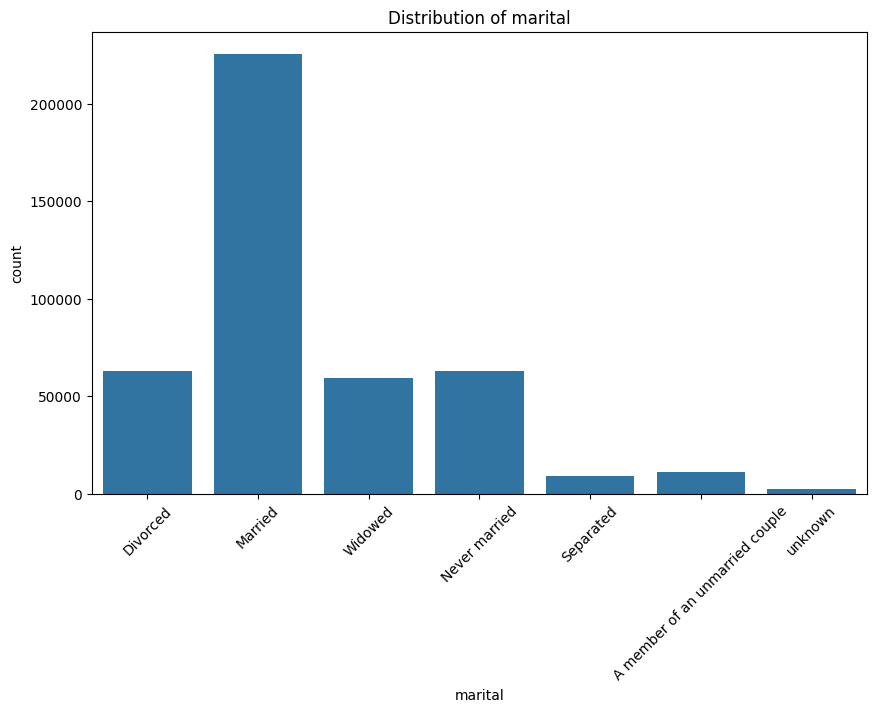

Summary Statistics:
count    433226.000000
mean          0.417672
std           0.808987
min           0.000000
25%           0.000000
50%           0.000000
75%           0.498858
max           3.000000
Name: children, dtype: float64


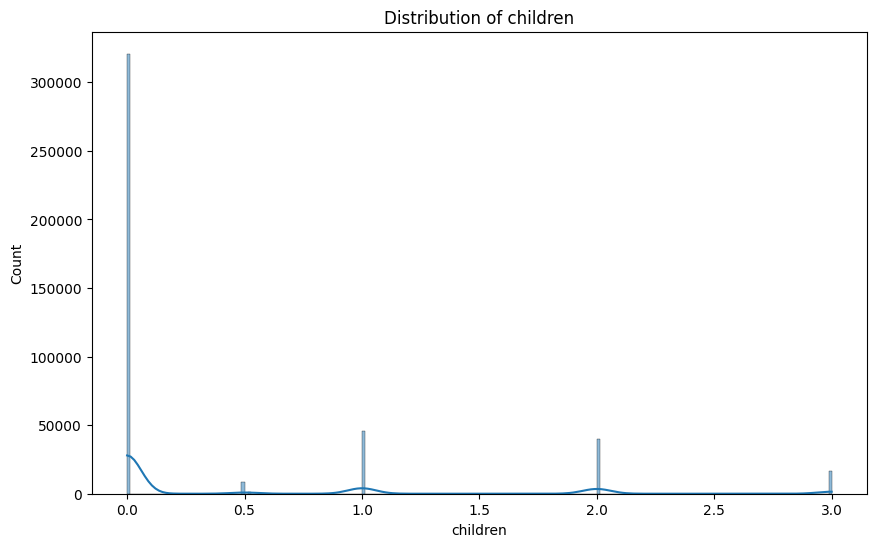

Value Counts:
educa
College 4 years or more (College graduate)                      152197
Grade 12 or GED (High school graduate)                          124603
College 1 year to 3 years (Some college or technical school)    119424
Grades 9 though 11 (Some high school)                            24023
Grades 1 through 8 (Elementary)                                  11395
unknown                                                           1043
Never attended school or only kindergarten                         541
Name: count, dtype: int64


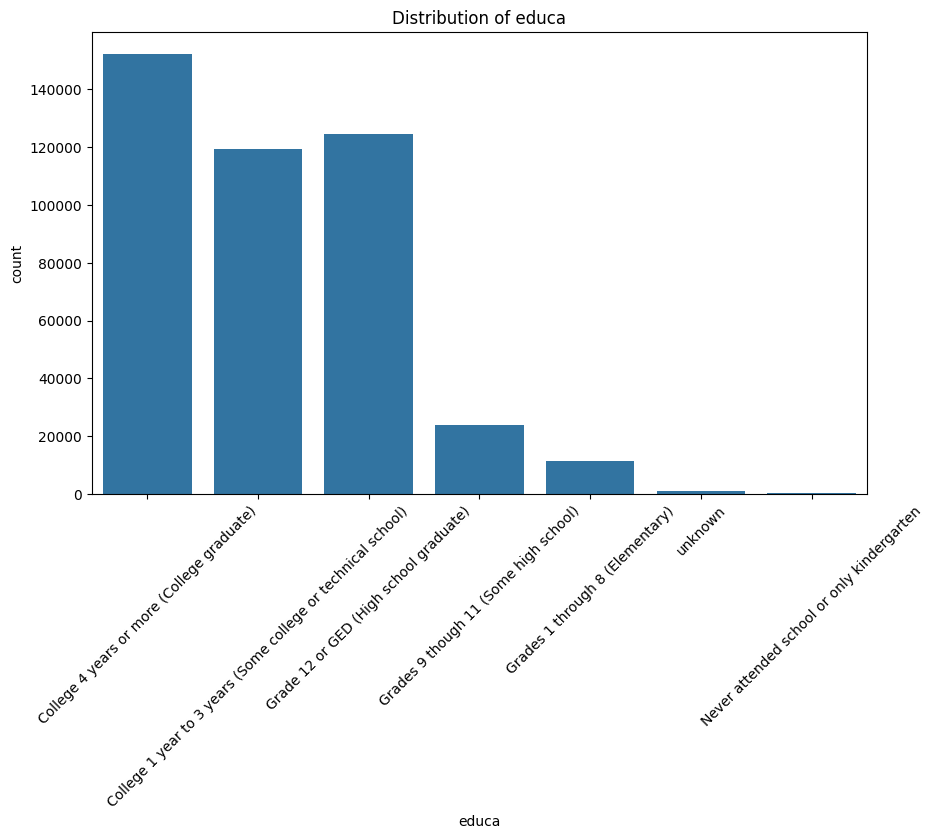

Value Counts:
employ1
Employed for wages                  176085
Retired                             125927
Self-employed                        35251
Unable to work                       33190
A homemaker                          28075
Out of work for 1 year or more       12151
Out of work for less than 1 year     10377
A student                            10364
unknown                               1806
Name: count, dtype: int64


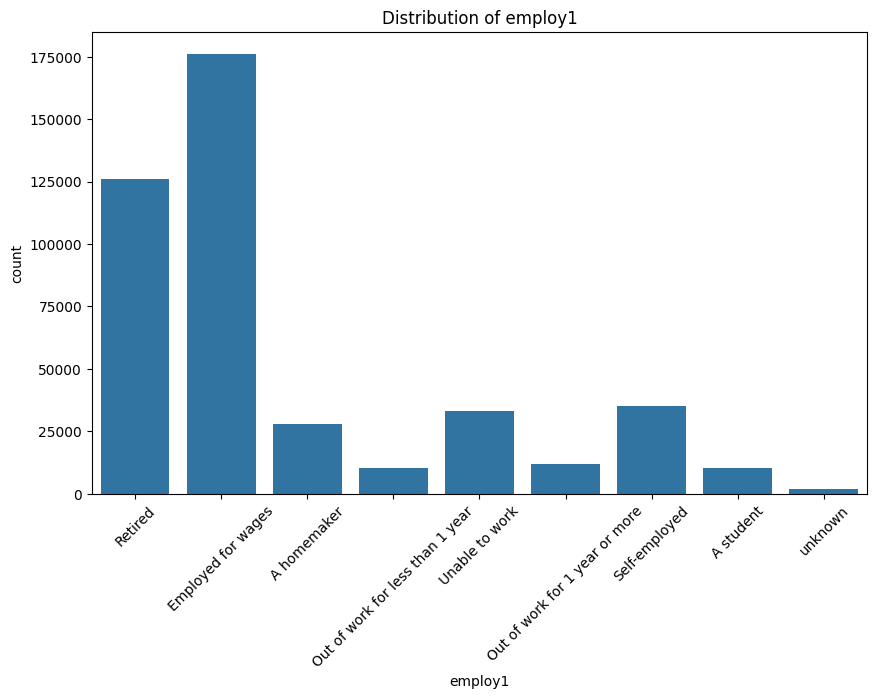

Value Counts:
income2
$75,000 or more      104592
unknown               58894
Less than $75,000     58807
Less than $50,000     55081
Less than $35,000     43326
Less than $25,000     36649
Less than $20,000     30456
Less than $15,000     23540
Less than $10,000     21881
Name: count, dtype: int64


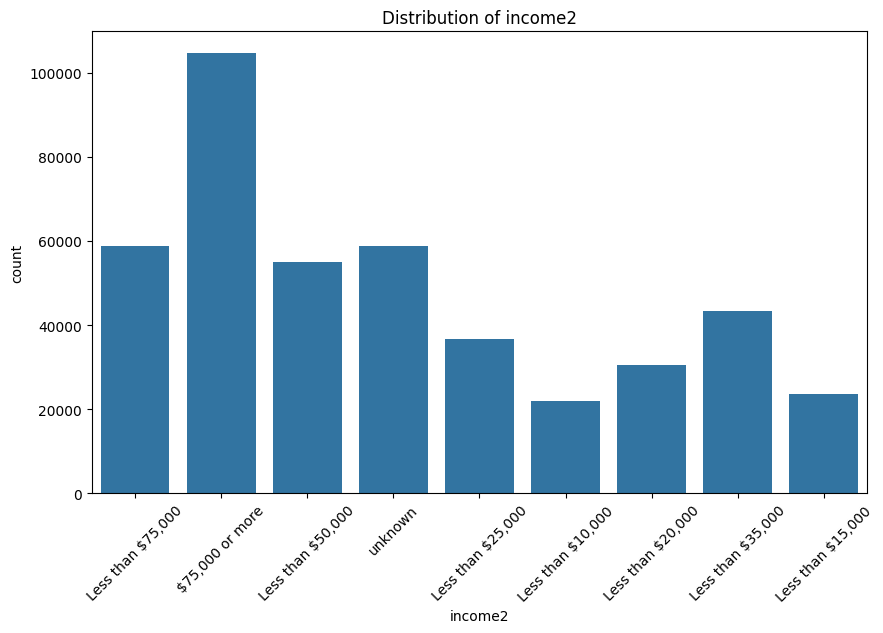

Summary Statistics:
count    433226.000000
mean        177.476190
std          43.765048
min           3.000000
25%         145.000000
50%         174.000000
75%         200.000000
max         693.000000
Name: weight2, dtype: float64


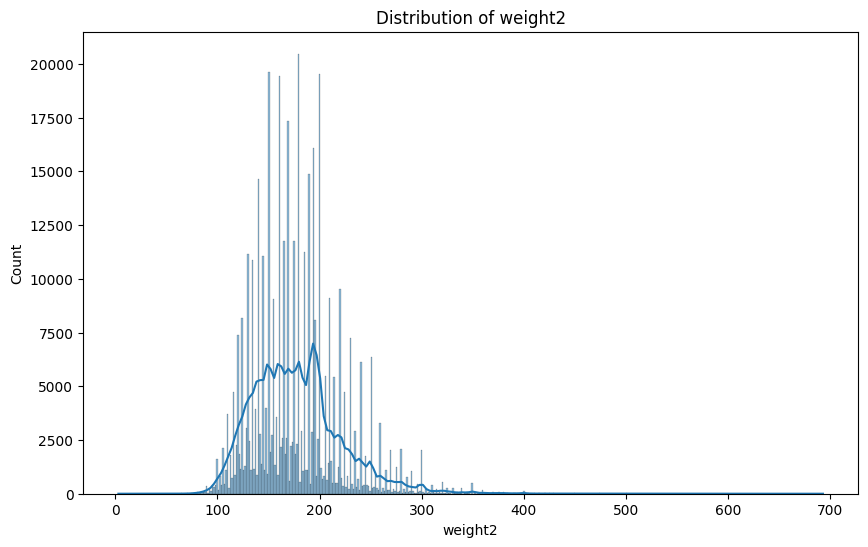

Summary Statistics:
count    433226.000000
mean        517.740931
std          36.617893
min           1.000000
25%         504.000000
50%         506.000000
75%         510.000000
max         803.000000
Name: height3, dtype: float64


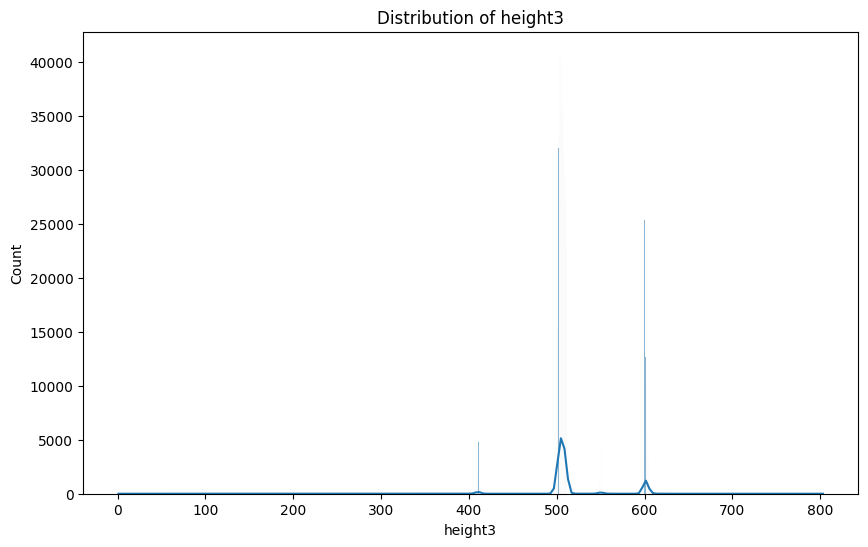

Value Counts:
sex
Female     257996
Male       175223
unknown         7
Name: count, dtype: int64


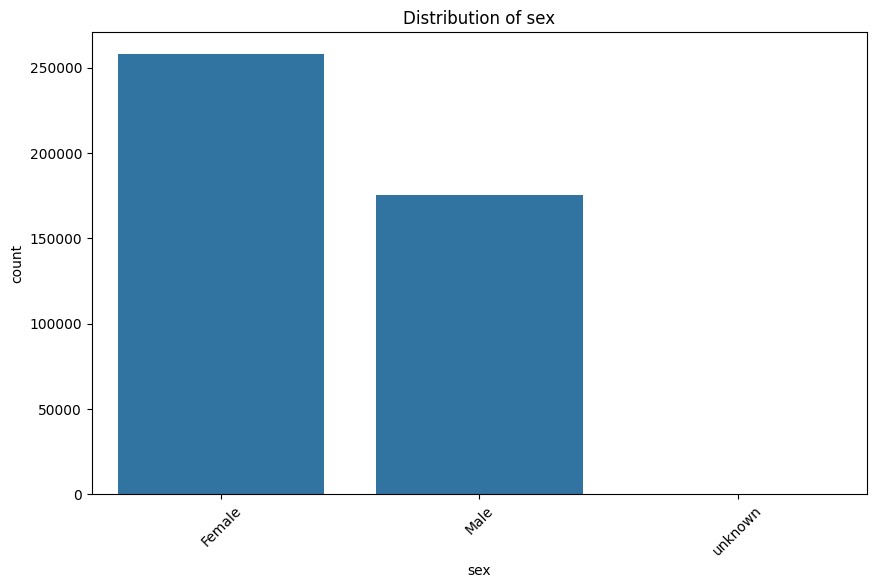

Value Counts:
pregnant
unknown    368064
No          62602
Yes          2560
Name: count, dtype: int64


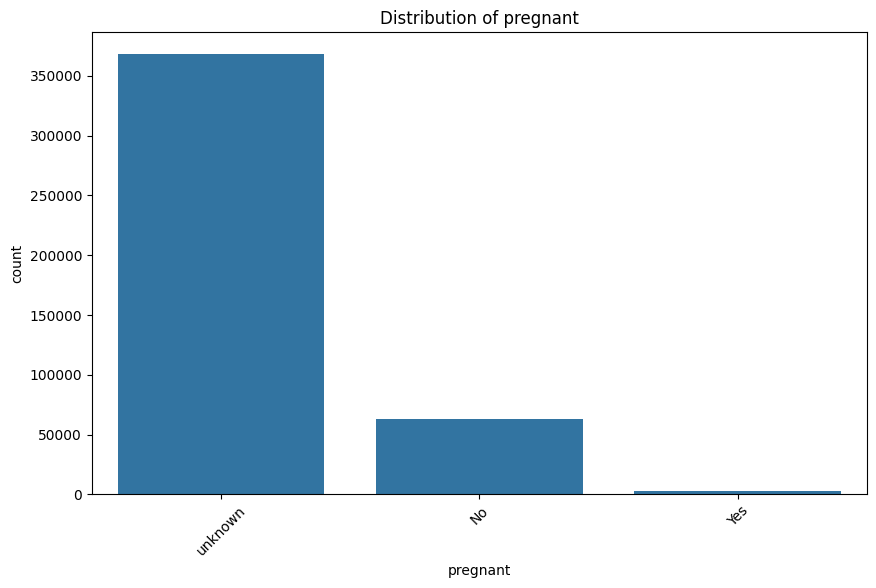

Value Counts:
internet
Yes        327570
No         104597
unknown      1059
Name: count, dtype: int64


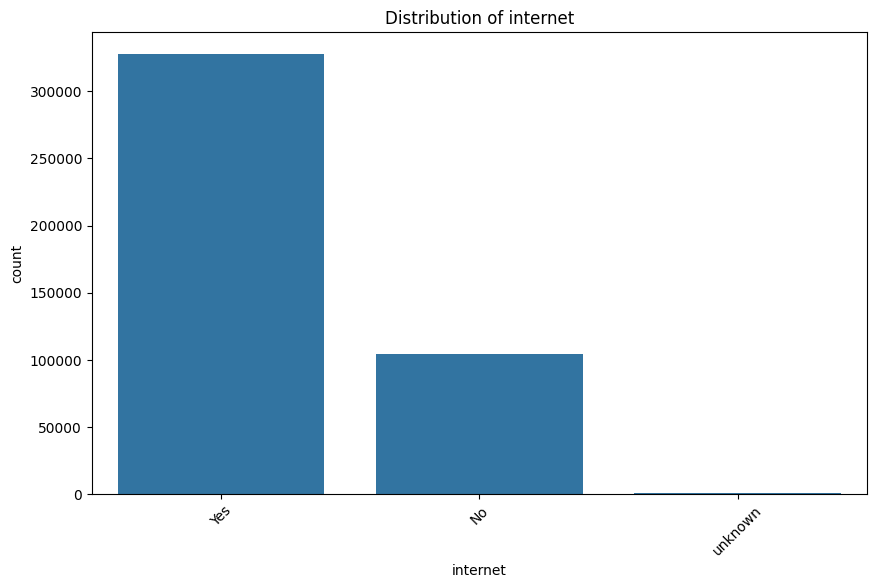

Value Counts:
blind
No         408393
Yes         23521
unknown      1312
Name: count, dtype: int64


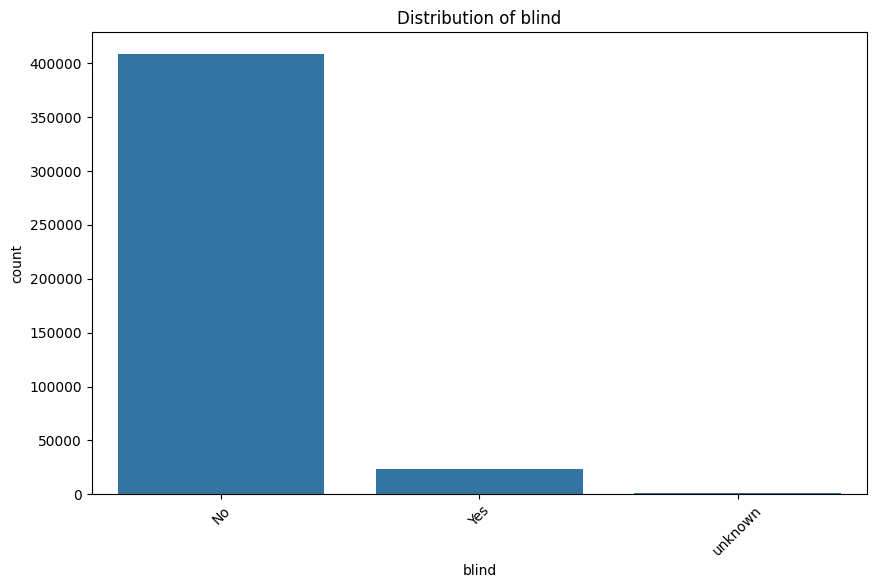

Value Counts:
diffwalk
No         352289
Yes         79249
unknown      1688
Name: count, dtype: int64


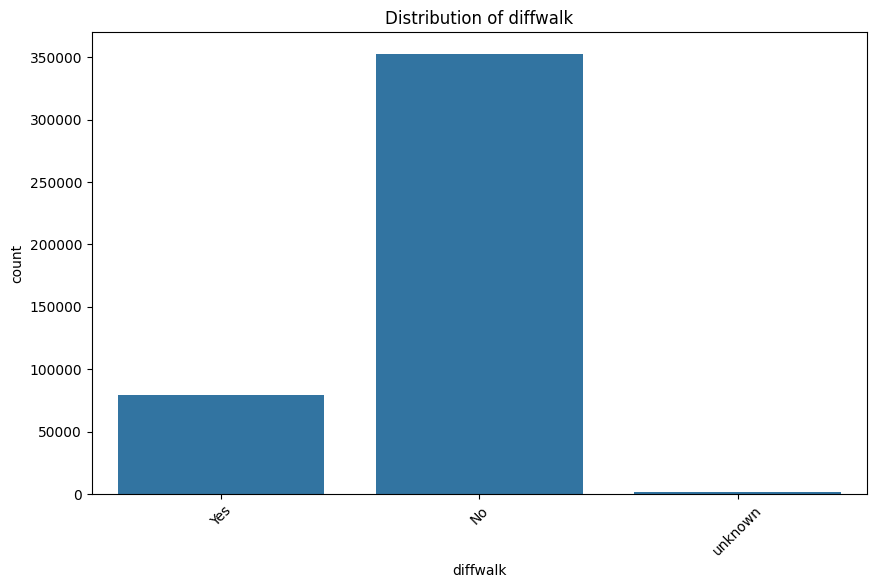

Value Counts:
smoke100
No         235761
Yes        195301
unknown      2164
Name: count, dtype: int64


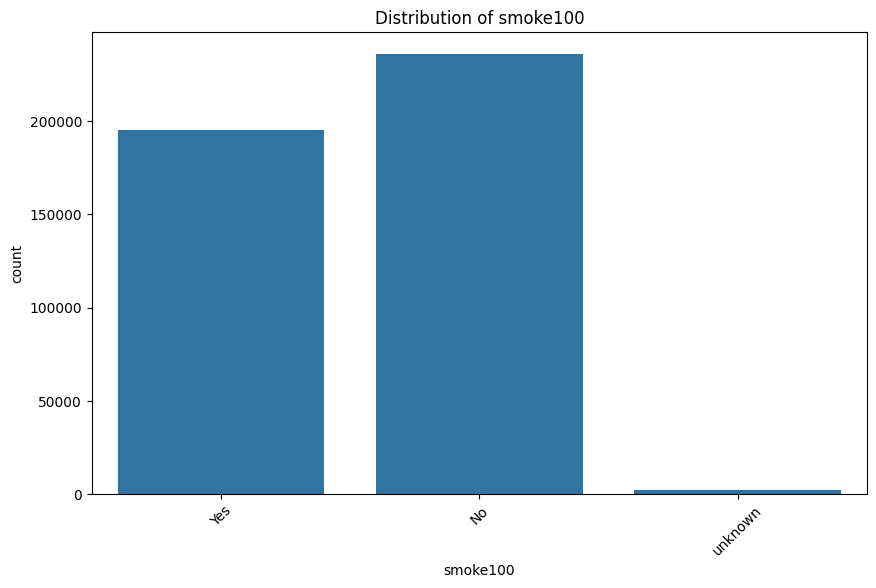

Value Counts:
drnkany5
Yes        216109
No         212779
unknown      4338
Name: count, dtype: int64


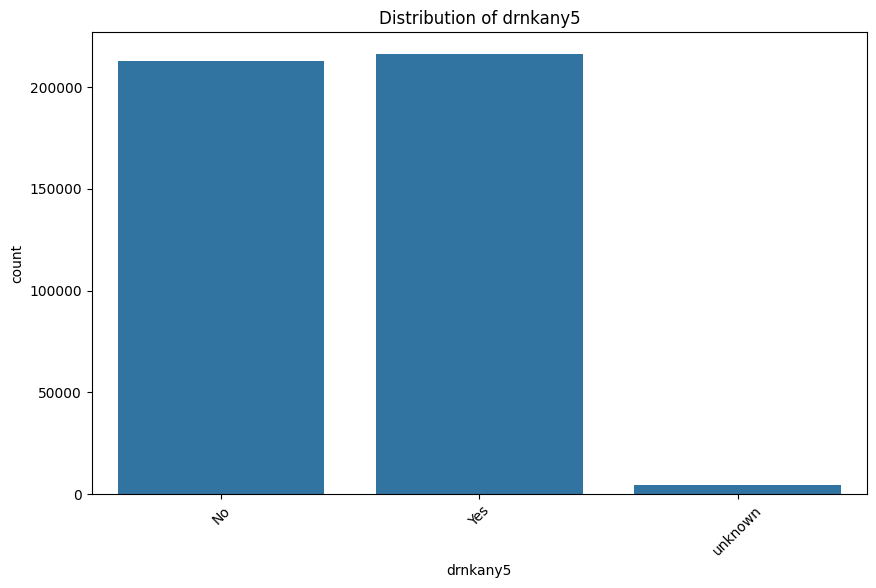

In [19]:
# Define the columns to be used for stratified sampling
# This is based on importance of the columns in order to maintain a wide demographic across the sample


async def main(df,columns_for_stratification,categorical_columns):
  tasks = []
  for col in columns_for_stratification:
    if col in categorical_columns:
      tasks.append(eda_categorical(df, col))
    else:
      tasks.append(eda_numerical(df, col))


  # Run tasks
  await asyncio.gather(*tasks)

# Run the main function
await main(df, columns_of_interest,categorical_columns)

# Stratified Sampling - Using KMeans

In [35]:
# Categorical Columns which are of interest to encode the labels
intersection = np.intersect1d(categorical_columns, columns_of_interest)

In [36]:
# Encode all categorical columns

# Create a dictionary to store mappings between original values and encoded labels
label_mappings = {}
df_clean_encoded = df_clean.copy()
# Apply label encoding to each categorical column
for col in intersection:
    label_encoder = LabelEncoder()
    df_clean_encoded[col] = label_encoder.fit_transform(df_clean_encoded[col]).copy()
    # Store the mapping for this column
    label_mappings[col] = {label: original_value for label, original_value in zip(label_encoder.classes_, label_encoder.inverse_transform(range(len(label_encoder.classes_))))}

# Now all categorical columns are converted into numeric labels, and label mappings are stored in label_mappings


In [37]:
# Perform K-means clustering to create K clusters based on the columns of interest
K = 6
kmeans = KMeans(n_clusters=K, random_state=42)  # Adjust the number of clusters as needed
df_clean_encoded['cluster'] = kmeans.fit_predict(df_clean_encoded[columns_of_interest])

# Initialize an empty DataFrame to store the sampled data
sampled_data = pd.DataFrame()

# Define the number of samples to take from each cluster - MODIFY THIS TO INCREASE OR DECREASE THE NUMBER OF TOTAL SAMPLES
samples_per_cluster = 3000

# Take random samples from each cluster
for cluster_id in range(K):  # Assuming you have 10 clusters
    # Select data points belonging to the current cluster
    cluster_data = df_clean_encoded[df_clean_encoded['cluster'] == cluster_id]

    # Take a random sample from the cluster
    if len(cluster_data) > samples_per_cluster:
        cluster_sample = cluster_data.sample(n=samples_per_cluster, random_state=42)
    else:
        cluster_sample = cluster_data

    # Append the cluster sample to the overall sampled data
    sampled_data = pd.concat([sampled_data, cluster_sample])

# Remove the 'cluster' column as it's no longer needed
sampled_data.drop(columns=['cluster'], inplace=True)




/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


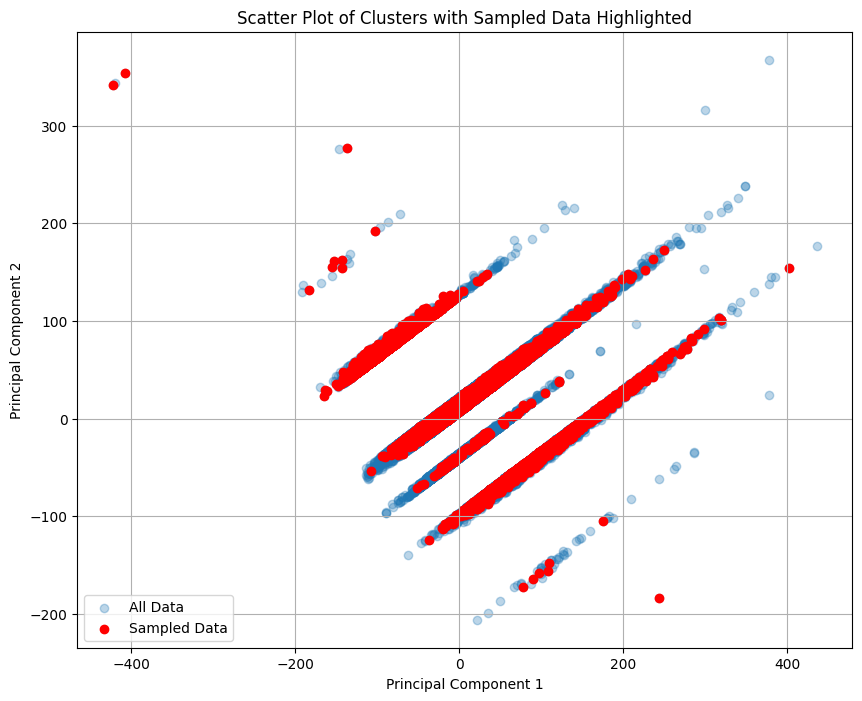

In [38]:
# Perform PCA decomposition with 2 principal components
pca = PCA(n_components=2, random_state=42)
pca_result = pca.fit_transform(df_clean[columns_of_interest])

# Scatter plot for all data points
plt.figure(figsize=(10, 8))
plt.scatter(pca_result[:, 0], pca_result[:, 1], alpha=0.3, label='All Data')

# Scatter plot for sampled data points (highlighted)
sampled_pca_result = pca.transform(sampled_data[columns_of_interest])
plt.scatter(sampled_pca_result[:, 0], sampled_pca_result[:, 1], color='red', label='Sampled Data')

plt.title('Scatter Plot of Clusters with Sampled Data Highlighted')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.legend()
plt.grid(True)
plt.show()


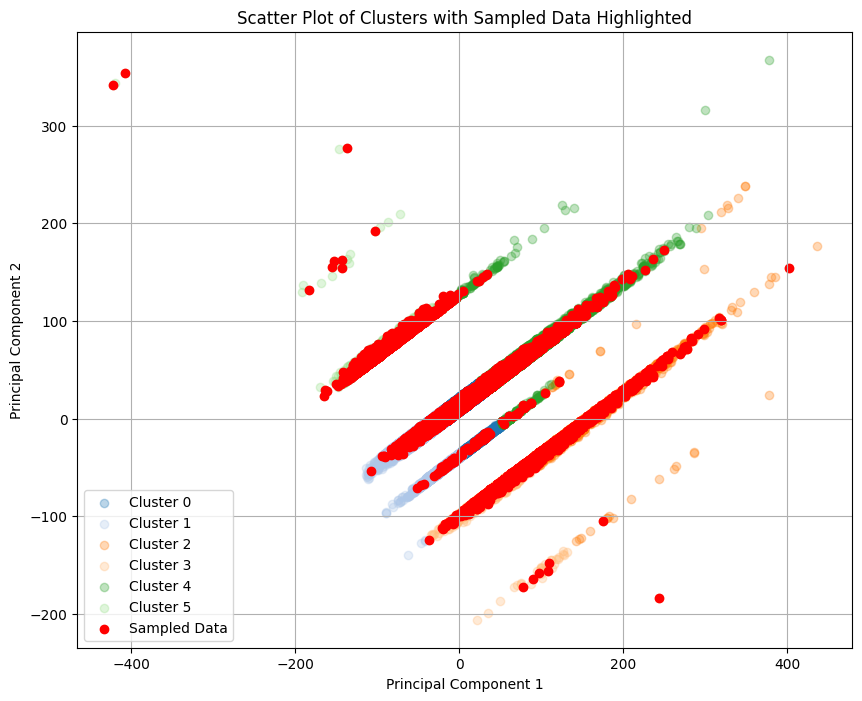

In [39]:
# Assign a color to each cluster
colors = plt.cm.tab20(np.linspace(0, 1, 20))

# Scatter plot for all data points with clusters
plt.figure(figsize=(10, 8))
for cluster_id in range(K):  # Assuming you have 20 clusters
    cluster_indices = np.where(df_clean['cluster'] == cluster_id)[0]
    plt.scatter(pca_result[cluster_indices, 0], pca_result[cluster_indices, 1], alpha=0.3, color=colors[cluster_id], label=f'Cluster {cluster_id}')

# Scatter plot for sampled data points (highlighted)
plt.scatter(sampled_pca_result[:, 0], sampled_pca_result[:, 1], color='red', label='Sampled Data')

plt.title('Scatter Plot of Clusters with Sampled Data Highlighted')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.legend()
plt.grid(True)
plt.show()


# Results

In [42]:
print("The sampling has a total of ", sampled_data.shape[0]," rows. This number can be increased if needed, increasing the total number of samples per cluster.")

The sampling has a total of  18000  rows. This number can be increased, increasing the total number of samples per cluster.
